In [29]:
import torch
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if GPU is available
print(torch.cuda.is_available())

devices = ['cuda', 'cpu']

True


# GPU Demo

## Task 1.
Demonstrate tensor multiplication on GPU vs. CPU.

### Define operation

In [58]:
class args:
    num_iterations = 100
    vector_sizes = torch.logspace(1, 7, 4, dtype=int)


# Function to perform random vector multiplication and track compute time
def random_vector_multiplication(vector_size, device_to_use):
    # Generate random vectors
    vec1 = torch.randn(vector_size, device=device_to_use)
    vec2 = torch.randn(vector_size, device=device_to_use)
    
    # Measure compute time
    start_time = time.time()
    result = vec1 * vec2
    torch.cuda.synchronize()  # Ensure all operations are complete
    end_time = time.time()

    return float(end_time - start_time)

### Generate data

In [59]:
times = [(random_vector_multiplication(size, device), size, device) for size in args.vector_sizes for device in devices for _ in range(args.num_iterations)]
times_df = pd.DataFrame(times, columns=['time', 'size', 'device'])

### Plot results

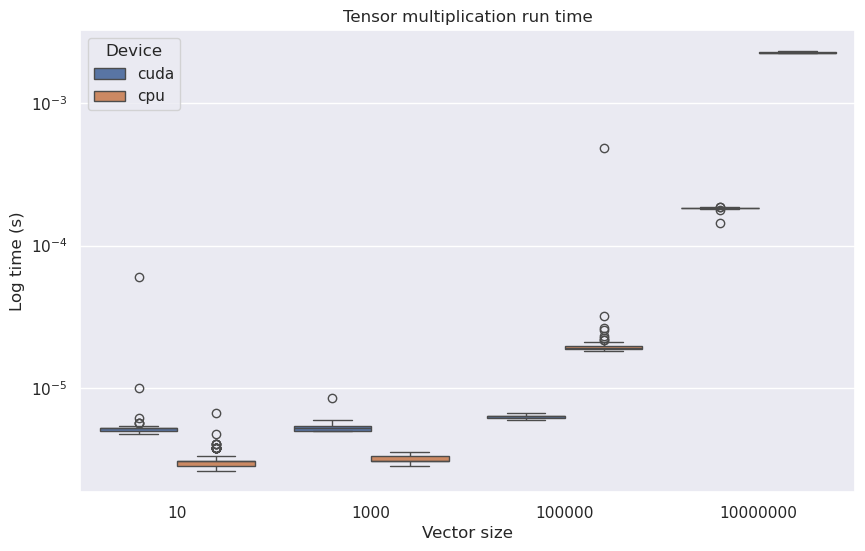

In [60]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(data=times_df,
            x="size",
            y="time",
            hue="device")
plt.yscale('log')
plt.title('Tensor multiplication run time')
plt.ylabel('Log time (s)')
plt.xlabel('Vector size')
plt.legend(title='Device')
plt.show()
plt.close()

## Task 2.
Backpropagate a multilayer perceptron on GPU vs. CPU.

### Define operation

In [52]:
class args:
    num_iterations = 100
    vector_sizes = torch.logspace(1, 5, 4, dtype=int)
    

def mlp_step(vector_size, device):
    # Define a simple MLP model
    model = torch.nn.Sequential(
        torch.nn.Linear(vector_size, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 1)
    ).to(device)

    # Define a loss function and an optimizer
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # Dummy input and target tensors
    input_tensor = torch.randn(100, vector_size).to(device)
    target_tensor = torch.randn(100, 1).to(device)

    # Measure compute time
    start_time = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(input_tensor)
    loss = loss_fn(output, target_tensor)
    loss.backward()
    optimizer.step()
    end_time = time.time()

    return float(end_time - start_time)

### Generate data

In [53]:
times = [(mlp_step(size, device), size, device) for size in args.vector_sizes for device in devices for _ in range(args.num_iterations)]
times_df = pd.DataFrame(times, columns=['time', 'size', 'device'])

### Plot results

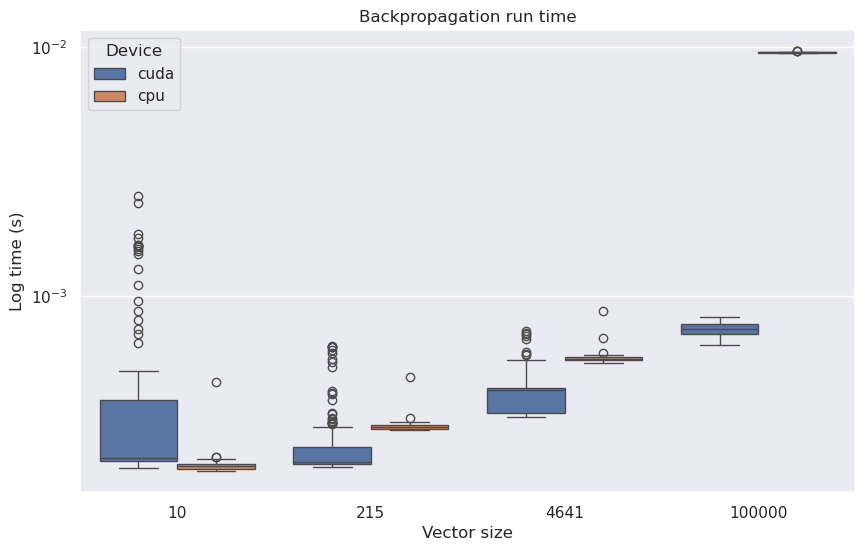

In [54]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(data=times_df,
            x="size",
            y="time",
            hue="device")
plt.yscale('log')
plt.title('Backpropagation run time')
plt.ylabel('Log time (s)')
plt.xlabel('Vector size')
plt.legend(title='Device')
plt.show()
plt.close()

## Task 3.
Perform insertion sort on GPU vs. CPU.

### Define operation

In [80]:
class args:
    num_iterations = 100
    vector_sizes = torch.logspace(1, 4, 4, dtype=int)


def insertion_sort(vector_size, device_to_use):
    # Generate random vectors
    arr = torch.randint(0, 100, (vector_size,), device=device_to_use)

    start_time = time.time()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    end_time = time.time()
    return float(end_time - start_time)

### Generate data

In [81]:
times = [(insertion_sort(size, device), size, device) for size in args.vector_sizes for device in devices for _ in range(args.num_iterations)]
times_df = pd.DataFrame(times, columns=['time', 'size', 'device'])

### Plot results

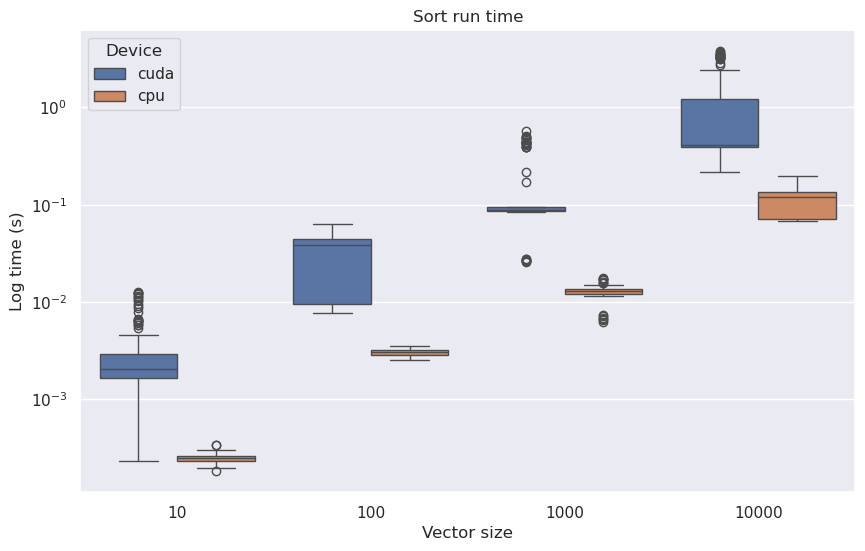

In [82]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(data=times_df,
            x="size",
            y="time",
            hue="device")
plt.yscale('log')
plt.title('Sort run time')
plt.ylabel('Log time (s)')
plt.xlabel('Vector size')
plt.legend(title='Device')
plt.show()
plt.close()